In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [6]:
#Importing the data set
import os

os.getcwd()

'/drive/notebooks'

In [3]:
#PREPARE DATA
#A.) Import
df = pd.read_csv("insurance.csv")
df.shape

(1338, 7)

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


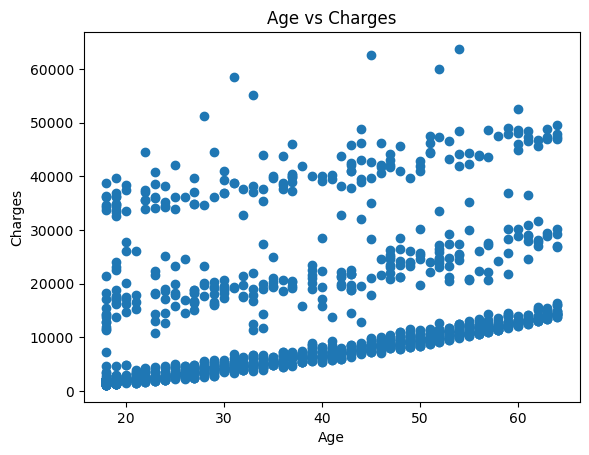

In [14]:
#B.) Exploratory Data Analysis (EDA)

#1.Impact of Age on Premiums.
plt.scatter(x=df["age"], y=df["charges"])
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs Charges")
plt.show()

In [3]:
#2.Gender Disparities

def categorize_age(age):
    if age < 20:
        return "Under 20"
    elif 20 <= age <= 30:
        return "21 - 30"
    elif 31 <= age <= 40:
        return "31 - 40"
    elif 41 <= age <= 50:
        return "41 - 50"
    elif 51 <= age <= 60:
        return "51 - 60"
    else:
        return "Above 60"
df["age_category"] = df["age"].apply(categorize_age)
df["age_category"].head()

0    Under 20
1    Under 20
2     21 - 30
3     31 - 40
4     31 - 40
Name: age_category, dtype: object

In [5]:
import piplite
await piplite.install('seaborn')

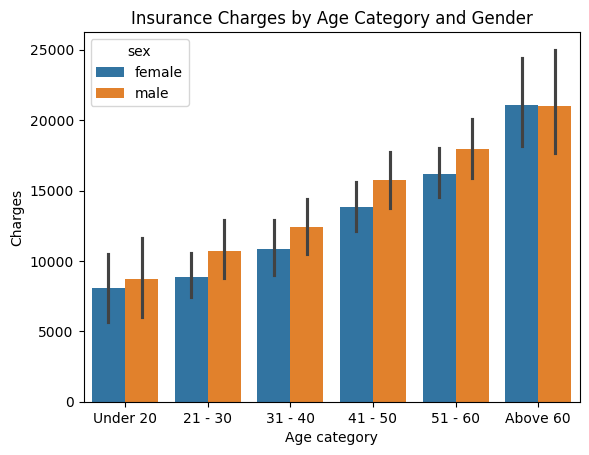

In [6]:
import seaborn as sns

sns.barplot(
    x="age_category",
    y="charges",
    data=df,
    hue="sex"
)
plt.xlabel("Age category")
plt.ylabel("Charges")
plt.title("Insurance Charges by Age Category and Gender")
plt.show();

In [8]:
#t-test to check the statistical significance difference in charges for the genders

from scipy.stats import ttest_ind

# Split the data by gender
charges_male = df[df["sex"] == "male"]["charges"]
charges_female = df[df["sex"] == "female"]["charges"]

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(charges_male, charges_female)
print("t_start:", t_stat)
print("p_value:", p_value)

t_start: 2.097546590051688
p_value: 0.03613272100592976


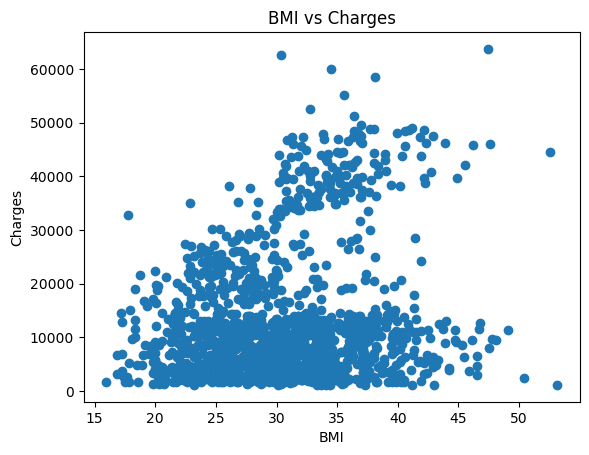

In [23]:
#3.Impact of BMI on Premiums.
plt.scatter(x=df["bmi"], y=df["charges"])
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs Charges")
plt.show();

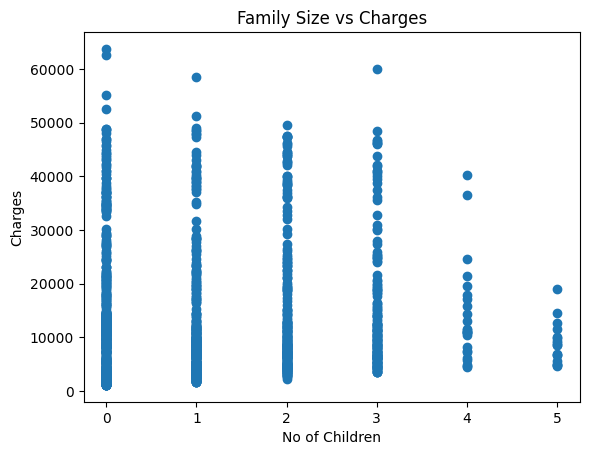

In [24]:
#4.Impact of Family Size on Premiums.
plt.scatter(x=df["children"], y=df["charges"])
plt.xlabel("No of Children")
plt.ylabel("Charges")
plt.title("Family Size vs Charges")
plt.show();

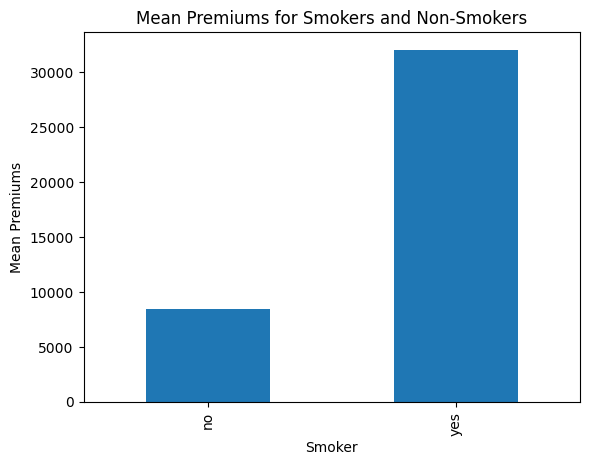

In [28]:
#5.Impact of smoking on Premiums.

mean_premiums_by_smoking = df.groupby("smoker")["charges"].mean()
mean_premiums_by_smoking.plot(kind='bar')
plt.title('Mean Premiums for Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Mean Premiums')
plt.show();

In [29]:
#6. Regional variations in Premiums

df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
from scipy.stats import f_oneway

# Create separate premium data for each region
premiums_by_region = [df[df["region"] == region]["charges"] for region in df["region"].unique()]

# Perform ANOVA to test for differences in means
f_stat, p_value = f_oneway(*premiums_by_region)

print("t_start:", t_stat)
print("p_value:", p_value)

t_start: 2.097546590051688
p_value: 0.0308933560705201


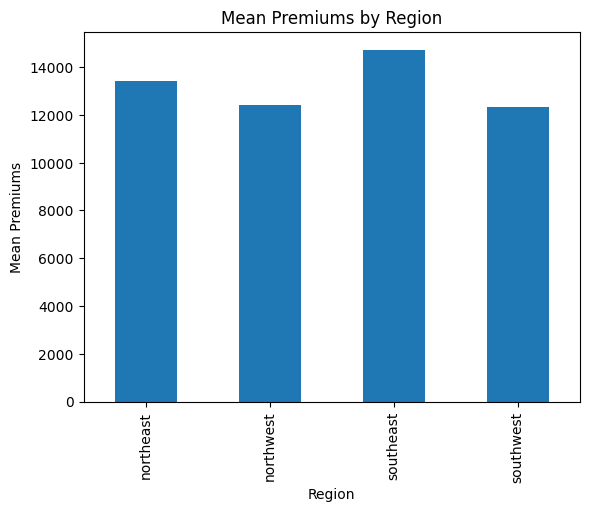

In [23]:
mean_premiums_by_region = df.groupby("region")["charges"].mean()
mean_premiums_by_region.plot(kind="bar")
plt.title("Mean Premiums by Region")
plt.xlabel("Region")
plt.ylabel("Mean Premiums")
plt.show();

In [6]:
#C.) Split

target = "charges"
features = ["age", "sex", "bmi", "children", "smoker", "region"]
y = df[target]
X = df[features]


In [7]:
#divide data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train_shape:", X_train.shape)
print("X_test_shape:", X_test.shape)
print("y_train_shape:", y_train.shape)
print("y_test_shape:", y_test.shape)

X_train_shape: (1070, 6)
X_test_shape: (268, 6)
y_train_shape: (1070,)
y_test_shape: (268,)


In [14]:
#BUILD MODEL

#A.) Baseline
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean Premium:", y_mean)
print("Baseline MAE:", mae_baseline)

Mean Premium: 13346.089736364485
Baseline MAE: 9000.55612964432


In [4]:
#B.) Iterate
import piplite
await piplite.install('category_encoders')
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline

In [9]:
ohe = OneHotEncoder(use_cat_names=True)
ohe.fit(X_train)
ohe.transform(X_train)
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['sex', 'smoker', 'region'],
                               use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [10]:
#C.) Evaluate
y_pred_training = model.predict(X_train)
print("Training MAE:", mean_absolute_error(y_train, y_pred_training))

Training MAE: 4208.2345724922225


In [11]:
y_pred_test = model.predict(X_test)
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))

Test MAE: 4181.194473753646


In [14]:
#COMMUNICATE RESULTS

# Get the intercept (bias) and coefficients
intercept = model.named_steps["linearregression"].intercept_
intercept

-574.5357125101636

In [16]:
coefficients = model.named_steps["linearregression"].coef_
coefficients

array([ 2.56975706e+02,  9.29584582e+00, -9.29584582e+00,  3.37092552e+02,
        4.25278784e+02, -1.18255644e+04,  1.18255644e+04,  8.89079180e+01,
        4.59585244e+02, -1.98279052e+02, -3.50214110e+02])

In [17]:
feature_names = model.named_steps["onehotencoder"].get_feature_names()
feature_names

/lib/python3.11/site-packages/category_encoders/utils.py:362: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


array(['age', 'sex_female', 'sex_male', 'bmi', 'children', 'smoker_no',
       'smoker_yes', 'region_northwest', 'region_northeast',
       'region_southeast', 'region_southwest'], dtype=object)

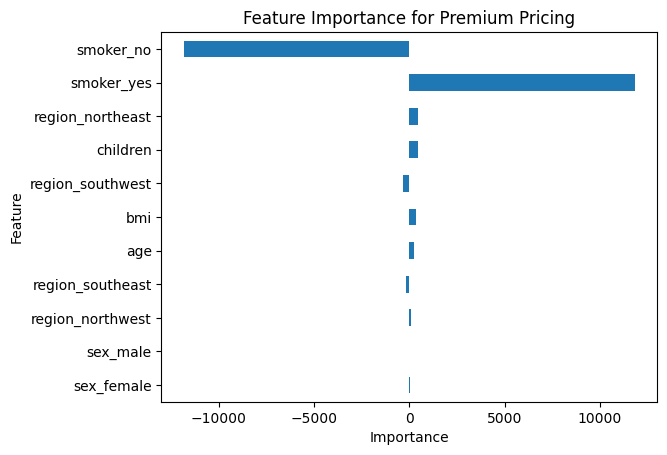

In [19]:
#Visualizing this

feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp.sort_values(key=abs).plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Premium Pricing")
plt.show();

In [29]:
#Wraping model in function
def make_prediction(age, gender, bmi, children, smoker, region):
    data = {
        "age":age,
        "sex":gender,
        "bmi":bmi,
        "children":children,
        "smoker":smoker,
        "region":region  
    }
    df=pd.DataFrame(data, index=[0])
    prediction=model.predict(df).round(2)[0]
    return f"Predicted premium: ${prediction}"


In [32]:
make_prediction(25, "female", 21, 0, "no", "northwest",)

'Predicted premium: $1201.44'